이자율과 실업에 대한 주가 예측 모델은 무엇인가

In [3]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


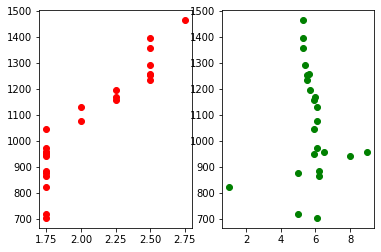

In [8]:
Interest_Rate = np.array([[2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,
                         2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75]],dtype=np.float32)
Unemplyment_Rate = np.array([[5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.7,5.9,6,6.1,6.1,
                            5.9,6.5,8,9,6.1,5.9,6.2,6.2,5,1,6.1,5]], dtype=np.float32)
Stock_Index_Price =np.array([[1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,
                            956,943,958,971,949,884,866,876,822,704,719]], dtype=np.float32)
import matplotlib.pyplot as plt
## 지금 이자율과 실업율의 단위가 달라서 그래프가 2개 나와야함
## subplot은 하나에 두개의 그림.. 즉 여기서는 1,2(한줄에 두개그래프) 중에 1번그래프
plt.subplot(1,2,1)
## 데이터가 np.array즉 행렬이기에 그래프는 그냥 1차원으로 그릴려고 flatten을 적어줌
plt.plot(Interest_Rate.flatten(), Stock_Index_Price.flatten(), 'ro')
## subplot은 하나에 두개의 그림.. 즉 여기서는 1,2(한줄에 두개그래프) 중에 2번그래프
plt.subplot(1,2,2)
plt.plot(Unemplyment_Rate.flatten(), Stock_Index_Price.flatten(), 'go')

이자율은 주식가격과 positive, 실업율은 negative관계를 이루고있군

In [14]:
## 이건 tensorflow의 버전문제로 sess가 구현안되서 넣어준거
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
sess=tf.compat.v1.Session()


## 같은 형태로 지정된 열벡터 T만들기
T = tf.ones([1,24], dtype=tf.float32)
## 학습데이터를 공급받을 하나의 placeholder 지정
y = tf.constant(Stock_Index_Price, shape = (24,1), dtype=tf.float32)
## 이자율과, 실업,t가 concate해서 A생성
A = tf.transpose(tf.concat([Interest_Rate, Unemplyment_Rate, T],0))
## A는 정방행렬이 아니기 때문에 의사역행렬에 y를 곱해서 
## 두개의기울기와 절편b를 구해야함
pinv = tf.matmul(tf.linalg.inv(tf.matmul(tf.transpose(A), A)), tf.transpose(A))
w = tf.matmul(pinv,y)
print(sess.run(w))  ## 3*1 행렬





[[ 560.59326]
 [  20.60955]
 [-205.53998]]


위에 두개는 기울기, 마지막거는 Y절편

In [17]:
## 이건 tensorflow의 버전문제로 placeholder가 구현안되서 넣어준거
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(tf.float32, shape=(None,3))
h = tf.matmul(x,w)
## [5.1,6.2,1],[5.1,6.1,1] 실업이 6.2->6.1 된경우
## [5.1,6.2,1],[5.2,6.2,1] 이자가 5.1->5.2  된경우 
## 행렬 맞출려고 마지막에 다들 1넣음
result = sess.run(h, feed_dict={x:[[5.1,6.2,1],[5.1,6.1,1],[5.1,6.2,1],[5.2,6.2,1]]})
print(result)

print(result[1]-result[0]) # 실업이 6.2->6.1 된경우
print(result[3]-result[2]) # 이자가 5.1->5.2  된경우 

[[2781.265 ]
 [2779.2039]
 [2781.265 ]
 [2837.3242]]
[-2.0610352]
[56.059326]


[[2781.265 ]  # [5.1,6.2,1]의 주가지수 2781.265

 [2779.2039]  #[5.1,6.1,1]
 
 [2781.265 ]   #[5.1,6.2,1]
 
 [2837.3242]] # [5.2,6.2,1]

[-2.0610352]  ##즉 실업이 0.1 %떨어지면 주가가 2포인트 하락
[56.059326]  ## 이자가 0.1% 상승하면 주가가 34 포인트 상승